In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_excel('/Users/lukin/Downloads/om100648v_si_002 (1).xls')
df1=df.drop(columns=['No.', 'PC1', 'PC2','PC3', 'PC4'])




In [51]:
from sklearn.preprocessing import StandardScaler
df=df.rename(index=str, columns={"S4'": "S4"})
steric = ['He8_steric', '<(H3P)Pt(PH3)', 'S4', 'DA-P-A(B)', 'DA-P-A(Au)','DA-P-A(Pd)', 'DA-P-A(Pt)', 'Au-Cl', 'Pd-Cl trans']
sigma = ['Q(B)', 'P-B', 'E(LUMO)', 'E(HOMO)' ]
pi = ['Q(Au)', 'Au-P', 'Q(Pd)', 'P-Pd',  'Q(Pt)', 'P-Pt', 'DP-A(Pd)', 'DP-A(Au)', 'DP-A(B)', 'DP-A(Pt)'] 
# Separating out the features

stericdf=df[steric].values
sigmadf=df[sigma].values
pidf=df[pi].values
# Standardizing the features
steric1 = StandardScaler().fit_transform(stericdf)
pi1 = StandardScaler().fit_transform(pidf)
sigma1= StandardScaler().fit_transform(sigmadf)


/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


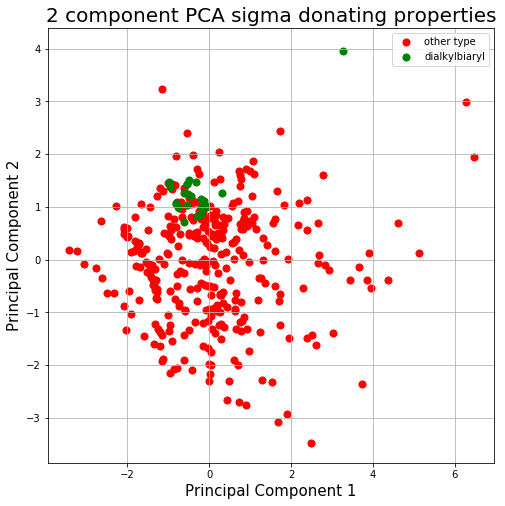

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sigma1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalDf['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA sigma donating properties', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = principalDf['Type'] == Type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


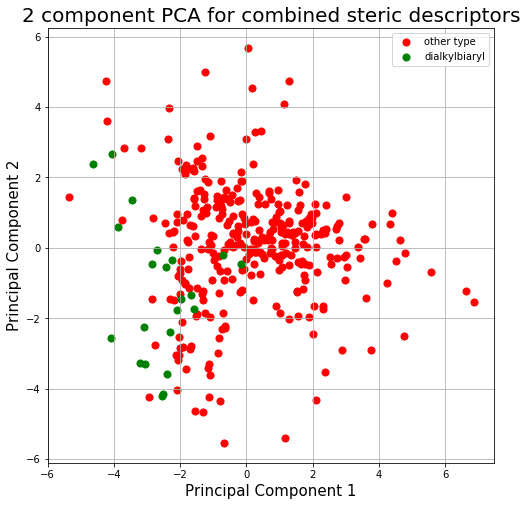

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(steric1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalDf['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for combined steric descriptors', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = principalDf['Type'] == Type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [67]:
df.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    df['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
df

/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,No.,Type,E(HOMO),E(LUMO),He8_steric,PA,Q(B),BE(B),P-B,DP-A(B),...,BE(Pt),P-Pt,DP-A(Pt),DA-P-A(Pt),<(H3P)Pt(PH3),S4,PC1,PC2,PC3,PC4
0,1,other type,-0.24636,-0.00029,2.300000,190.600000,-0.59000,26.100000,1.9410,-0.0130,...,8.80,2.328,-0.0010,1.50,109.40,66.9,-3.078250,0.797548,6.079200,-1.066060
1,2,other type,-0.19045,0.03268,3.000000,233.000000,-0.68000,39.200000,1.9260,-0.0280,...,12.90,2.331,-0.0100,1.30,107.50,39.4,1.602090,3.976490,1.536250,0.090199
2,3,other type,-0.27742,-0.05837,3.000000,182.300000,-0.56000,26.300000,1.9150,-0.0020,...,22.80,2.250,0.0080,-0.10,109.00,52.2,-7.225870,-3.301950,2.928580,2.031740
3,4,other type,-0.26620,-0.11270,20.660000,194.040000,-0.53820,22.510000,1.9240,-0.0050,...,16.58,2.260,0.0460,-2.40,106.60,28.7,-6.715490,-9.291470,1.348410,-0.823343
4,5,other type,-0.18723,0.02584,6.000000,239.100000,-0.68000,39.000000,1.9340,-0.0270,...,17.10,2.338,-0.0100,1.60,107.40,39.0,2.280310,3.407800,1.584350,0.167560
5,6,other type,-0.27210,-0.07070,9.920000,188.820000,-0.55510,24.350000,1.9240,0.0030,...,20.39,2.263,0.0210,-1.30,108.10,39.9,-6.589260,-5.686300,2.041120,1.589930
6,7,other type,-0.23430,-0.01640,7.460000,211.790000,-0.61780,32.020000,1.9230,-0.0240,...,16.55,2.303,0.0000,-0.30,108.30,38.4,-2.816240,0.659245,1.770150,0.043289
7,8,other type,-0.21290,-0.08380,11.620000,206.820000,-0.58720,25.070000,1.9760,0.0110,...,13.95,2.351,-0.0040,1.10,110.80,26.9,-2.012470,-6.067730,0.464185,5.496530
8,9,other type,-0.18767,0.02530,6.100000,241.900000,-0.68000,39.200000,1.9340,-0.0290,...,16.60,2.342,-0.0120,1.90,107.30,39.2,2.363270,3.633430,1.752600,0.002944
9,10,other type,-0.17950,0.02410,12.180000,244.600000,-0.69000,38.600000,1.9410,-0.0240,...,14.40,2.367,-0.0010,0.10,106.70,28.4,3.214110,1.968750,0.593753,-0.032901


/Users/lukin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


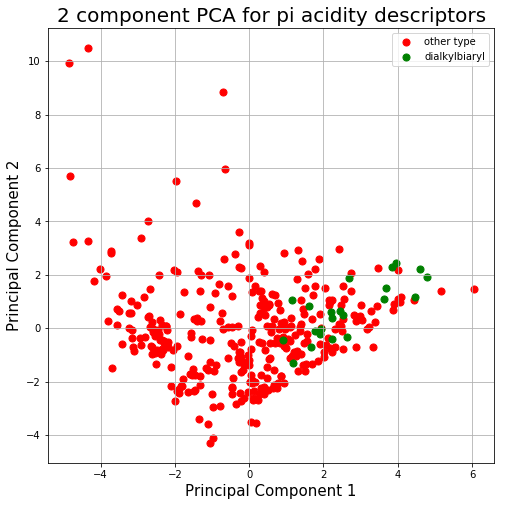

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pi1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.insert(1, 'Type', 'other type')
i = 159
while i <= 180:
    principalDf['Type'].iloc[i]='dialkylbiaryl'
    i=i+1
principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for pi acidity descriptors', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = principalDf['Type'] == Type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


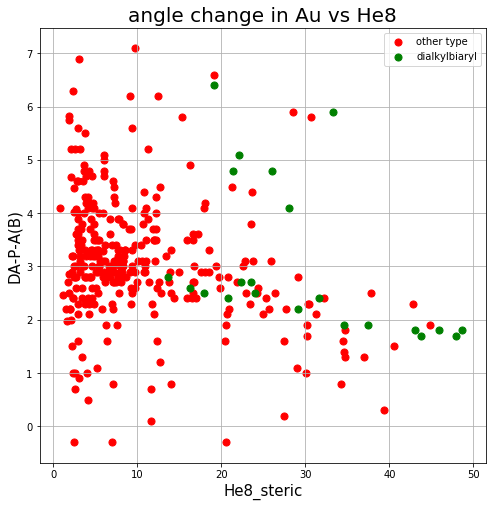

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('He8_steric', fontsize = 15)
ax.set_ylabel('DA-P-A(B)', fontsize = 15)
ax.set_title('angle change in Au vs He8', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'He8_steric']
               , df.loc[indicesToKeep, 'DA-P-A(B)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



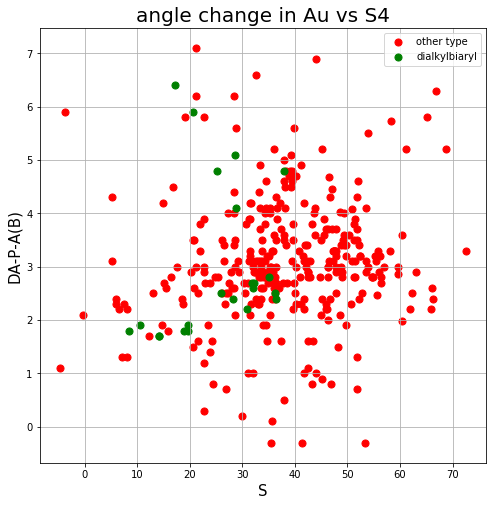

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('S', fontsize = 15)
ax.set_ylabel('DA-P-A(B)', fontsize = 15)
ax.set_title('angle change in Au vs S4', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'S4']
               , df.loc[indicesToKeep, 'DA-P-A(B)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



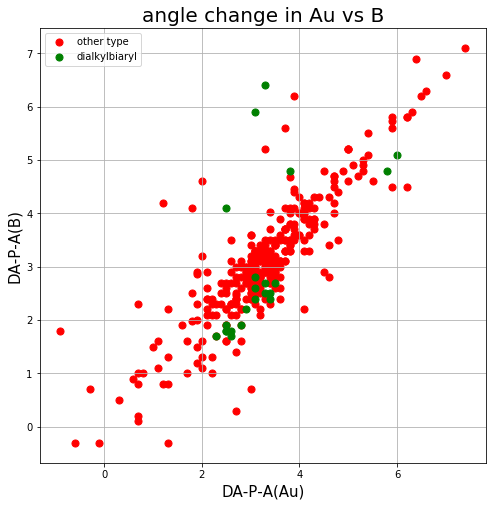

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(Au)', fontsize = 15)
ax.set_ylabel('DA-P-A(B)', fontsize = 15)
ax.set_title('angle change in Au vs B', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(Au)']
               , df.loc[indicesToKeep, 'DA-P-A(B)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() #4 outliers



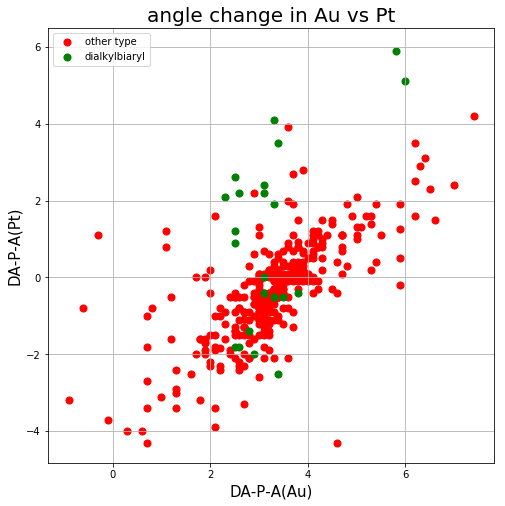

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(Au)', fontsize = 15)
ax.set_ylabel('DA-P-A(Pt)', fontsize = 15)
ax.set_title('angle change in Au vs Pt', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(Au)']
               , df.loc[indicesToKeep, 'DA-P-A(Pt)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 




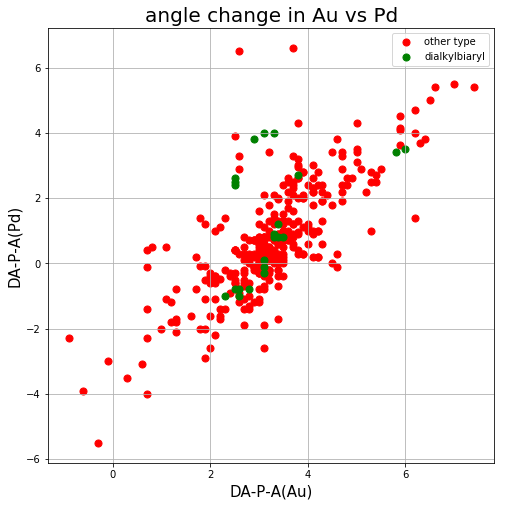

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(Au)', fontsize = 15)
ax.set_ylabel('DA-P-A(Pd)', fontsize = 15)
ax.set_title('angle change in Au vs Pd', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(Au)']
               , df.loc[indicesToKeep, 'DA-P-A(Pd)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()





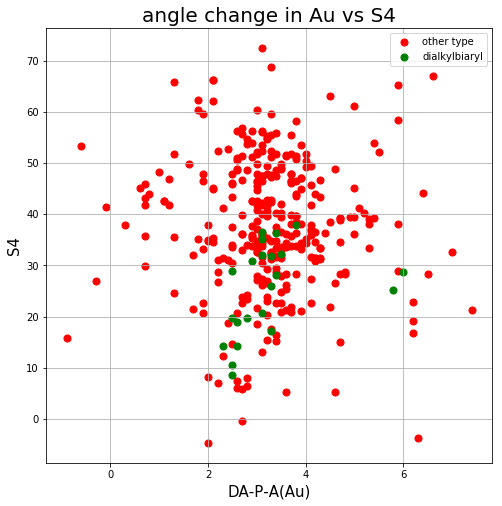

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(Au)', fontsize = 15)
ax.set_ylabel('S4', fontsize = 15)
ax.set_title('angle change in Au vs S4', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(Au)']
               , df.loc[indicesToKeep, 'S4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



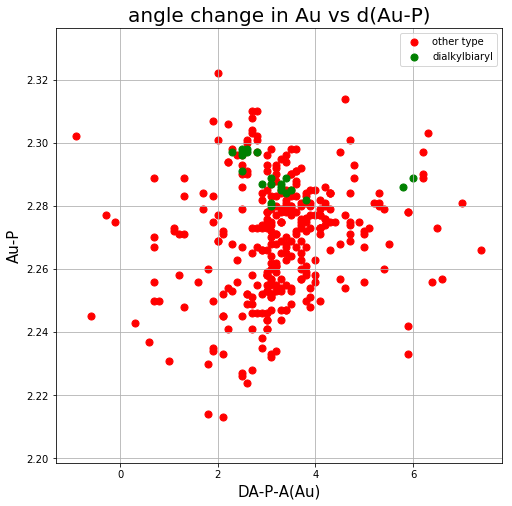

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(Au)', fontsize = 15)
ax.set_ylabel('Au-P', fontsize = 15)
ax.set_title('angle change in Au vs d(Au-P)', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(Au)']
               , df.loc[indicesToKeep, 'Au-P']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()





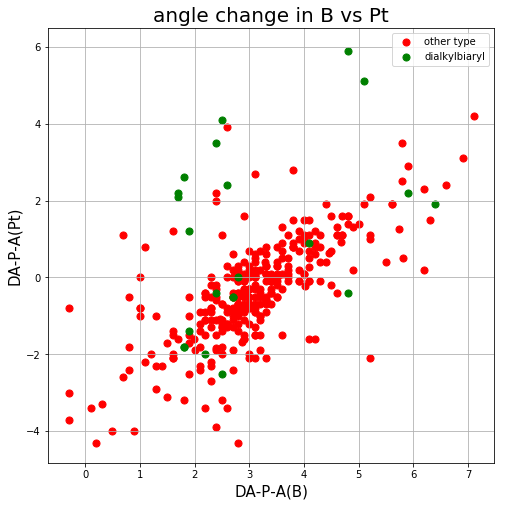

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(B)', fontsize = 15)
ax.set_ylabel('DA-P-A(Pt)', fontsize = 15)
ax.set_title('angle change in Pt vs B', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(B)']
               , df.loc[indicesToKeep, 'DA-P-A(Pt)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#9 outliers



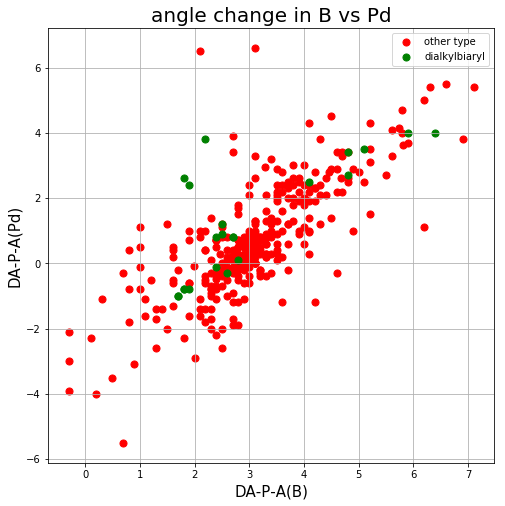

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('DA-P-A(B)', fontsize = 15)
ax.set_ylabel('DA-P-A(Pd)', fontsize = 15)
ax.set_title('angle change in Pd vs B', fontsize = 20)
targets = ['other type', 'dialkylbiaryl']
colors = ['r', 'g']
for Type, color in zip(targets, colors):
    indicesToKeep = df['Type'] == Type
    ax.scatter(df.loc[indicesToKeep, 'DA-P-A(B)']
               , df.loc[indicesToKeep, 'DA-P-A(Pd)']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() #3 outliers


